In [8]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import Hug, MCMC

In [18]:
def exppow_factory(loc, scale, p):
    def exppow(x):
        return 0.5 * jnp.sum(jnp.abs(x-loc)/scale)**p
    return exppow

In [23]:
x = np.array([1.0,0.5])
kernel = Hug(potential_fn=exppow_factory(0,1,2), step_size=1, trajectory_length=1)
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, init_params =x, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:01<00:00, 995.28it/s]


In [24]:
samples = mcmc.get_samples()
samples

DeviceArray([[ 1.        ,  0.5       ],
             [-0.13382274, -0.63382274],
             [-0.07747817, -0.69016707],
             ...,
             [ 1.2306116 , -0.37903583],
             [ 1.1474043 , -0.29582846],
             [ 0.4046532 , -1.0385795 ]], dtype=float32)

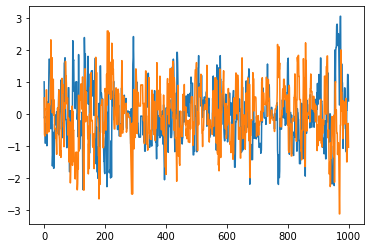

In [26]:
plt.plot(samples)

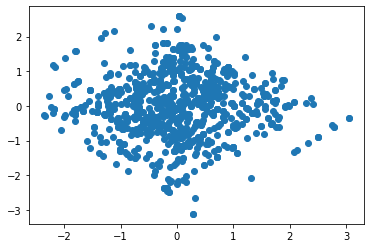

In [29]:
plt.scatter(x=samples[:,0], y=samples[:,1])

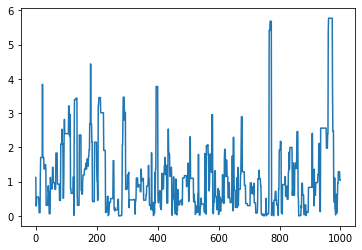

In [31]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(-0.01, 1.01)

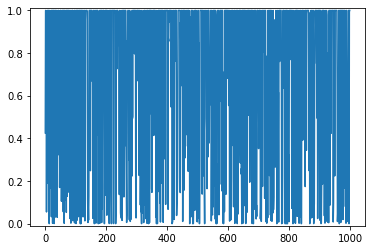

In [35]:
plt.plot(ap)
plt.ylim(-0.01,1.01)